In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```
공부시간(x1) : 2,4,6,8
과외받는 횟수(x2) : 0,4,2,3
성적(y) : 81, 93, 91, 97
```

In [2]:
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
X1=[i[0] for i in data]
X2=[i[1] for i in data]
Y=[i[2] for i in data]
print(X1)
print(X2)
print(Y)

[2, 4, 6, 8]
[0, 4, 2, 3]
[81, 93, 91, 97]


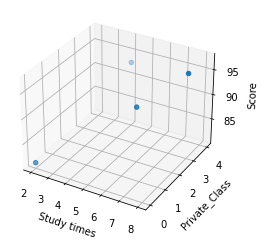

In [3]:
# 3차원 시각화
ax = plt.axes(projection ='3d')
ax.set_xlabel("Study times")
ax.set_ylabel("Private_Class")
ax.set_zlabel("Score")
ax.scatter(X1,X2,Y)
plt.show()

In [4]:
# 데이터를 넘파이 배열로 변환
X1_data=np.array(X1)
X2_data=np.array(X2)
Y_data=np.array(Y)
print(X1_data)
print(X2_data)
print(Y)

[2 4 6 8]
[0 4 2 3]
[81, 93, 91, 97]


In [32]:
# 기울기, 절편 초기화
a1=0
a2=0
b=0

In [33]:
# 학습률과 학습반복횟수 설정
lr = 0.003
epochs= 13000

In [34]:
for i in range(epochs):
    predict_y = a1 * X1_data + a2 * X2_data + b
    err = Y_data - predict_y
    
    # 편미분 연산( 독립변수가 2개이므로 2/len(X1_data))
    a1_diff = -(2/len(X1_data)) * sum(X1_data * err)
    a2_diff = -(2/len(X2_data)) * sum(X2_data * err)
    b_diff = -(2/len(Y_data)) * sum(err)
    
    # 기울기, 절편 업데이트
    a1 -= lr * a1_diff
    a2 -= lr * a2_diff
    b -= lr * b_diff
    
    if i % 100 == 0:
        print('epoch = %.d, a1 = %.04f, a2 = %.04f, b = %.04f' % (i,a1,a2,b))
print('y = %.04fx1 + %.04fx2 + %.04f' % (a1,a2,b))

epoch = 0, a1 = 2.7840, a2 = 1.2675, b = 0.5430
epoch = 100, a1 = 11.5852, a2 = 5.5952, b = 9.0771
epoch = 200, a1 = 10.6378, a2 = 5.3643, b = 15.3231
epoch = 300, a1 = 9.7939, a2 = 5.1155, b = 21.0025
epoch = 400, a1 = 9.0344, a2 = 4.8722, b = 26.1663
epoch = 500, a1 = 8.3474, a2 = 4.6433, b = 30.8611
epoch = 600, a1 = 7.7242, a2 = 4.4318, b = 35.1296
epoch = 700, a1 = 7.1584, a2 = 4.2381, b = 39.0104
epoch = 800, a1 = 6.6442, a2 = 4.0613, b = 42.5388
epoch = 900, a1 = 6.1768, a2 = 3.9003, b = 45.7467
epoch = 1000, a1 = 5.7520, a2 = 3.7537, b = 48.6632
epoch = 1100, a1 = 5.3658, a2 = 3.6204, b = 51.3148
epoch = 1200, a1 = 5.0147, a2 = 3.4992, b = 53.7256
epoch = 1300, a1 = 4.6954, a2 = 3.3890, b = 55.9174
epoch = 1400, a1 = 4.4052, a2 = 3.2888, b = 57.9101
epoch = 1500, a1 = 4.1413, a2 = 3.1977, b = 59.7219
epoch = 1600, a1 = 3.9014, a2 = 3.1149, b = 61.3691
epoch = 1700, a1 = 3.6833, a2 = 3.0396, b = 62.8666
epoch = 1800, a1 = 3.4850, a2 = 2.9711, b = 64.2282
epoch = 1900, a1 = 3.304

### 확인

In [36]:
predict = [a1 * X1[i] + a2 * X2[i] + b  for i in range(len(X1))]
print(predict)

[80.85691705905258, 92.99993109641909, 91.42856328752163, 96.71438640175616]


In [37]:
print(predict)
print(Y)

[80.85691705905258, 92.99993109641909, 91.42856328752163, 96.71438640175616]
[81, 93, 91, 97]


# fish 데이터로 다중회귀 분석

```
독립변수 : length, height
종속변수 : weight
```

In [38]:
fish=pd.read_csv("Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [40]:
length = fish["Length1"]
height = fish["Height"]
weight = fish["Weight"]
print(len(length))
print(len(height))
print(len(weight))

159
159
159


In [55]:
X1_data=np.array(length)
X2_data=np.array(height)
Y_data=np.array(weight)

In [71]:
# 기울기, 절편 초기화
a1 = 0
a2 = 0
b = 0

In [72]:
# 학습률과 학습반복횟수 설정
lr = 0.0005
epochs = 100000

In [73]:
for i in range(epochs):
    predict_y = a1 * X1_data + a2 * X2_data + b
    err = Y_data - predict_y
    
    # 편미분 연산
    a1_diff = -(2/len(X1_data)) * sum(X1_data * err)
    a2_diff = -(2/len(X2_data)) * sum(X2_data * err)
    b_diff = -(2/len(Y_data)) * sum(err)
    
    # 기울기, 절편 업데이트
    a1 -= lr * a1_diff
    a2 -= lr * a2_diff
    b -= lr * b_diff
    
    if i % 100 ==0:
        print("epoch = %.04d, a1 = %.04f, a2 = %.04f, b = %.04f" % (i,a1,a2,b))
        
print("y = %.04fx1 + %.04fx2 + %.04f" % (a1, a2, b))

epoch = 0000, a1 = 13.7112, a2 = 4.6778, b = 0.3983
epoch = 0100, a1 = 14.7272, a2 = 8.5952, b = -5.5367
epoch = 0200, a1 = 14.5119, a2 = 9.8241, b = -11.4885
epoch = 0300, a1 = 14.5363, a2 = 10.3355, b = -17.3774
epoch = 0400, a1 = 14.6435, a2 = 10.5943, b = -23.1987
epoch = 0500, a1 = 14.7785, a2 = 10.7636, b = -28.9512
epoch = 0600, a1 = 14.9222, a2 = 10.9005, b = -34.6350
epoch = 0700, a1 = 15.0678, a2 = 11.0251, b = -40.2508
epoch = 0800, a1 = 15.2129, a2 = 11.1445, b = -45.7992
epoch = 0900, a1 = 15.3567, a2 = 11.2611, b = -51.2810
epoch = 1000, a1 = 15.4989, a2 = 11.3759, b = -56.6971
epoch = 1100, a1 = 15.6394, a2 = 11.4891, b = -62.0481
epoch = 1200, a1 = 15.7783, a2 = 11.6010, b = -67.3350
epoch = 1300, a1 = 15.9155, a2 = 11.7114, b = -72.5584
epoch = 1400, a1 = 16.0511, a2 = 11.8206, b = -77.7191
epoch = 1500, a1 = 16.1851, a2 = 11.9284, b = -82.8178
epoch = 1600, a1 = 16.3174, a2 = 12.0349, b = -87.8554
epoch = 1700, a1 = 16.4482, a2 = 12.1401, b = -92.8326
epoch = 1800, a1

epoch = 18800, a1 = 25.8476, a2 = 19.7054, b = -450.6012
epoch = 18900, a1 = 25.8640, a2 = 19.7186, b = -451.2251
epoch = 19000, a1 = 25.8802, a2 = 19.7317, b = -451.8415
epoch = 19100, a1 = 25.8962, a2 = 19.7445, b = -452.4505
epoch = 19200, a1 = 25.9120, a2 = 19.7573, b = -453.0522
epoch = 19300, a1 = 25.9276, a2 = 19.7698, b = -453.6467
epoch = 19400, a1 = 25.9431, a2 = 19.7822, b = -454.2341
epoch = 19500, a1 = 25.9583, a2 = 19.7945, b = -454.8144
epoch = 19600, a1 = 25.9734, a2 = 19.8066, b = -455.3877
epoch = 19700, a1 = 25.9882, a2 = 19.8186, b = -455.9542
epoch = 19800, a1 = 26.0030, a2 = 19.8304, b = -456.5138
epoch = 19900, a1 = 26.0175, a2 = 19.8421, b = -457.0668
epoch = 20000, a1 = 26.0318, a2 = 19.8537, b = -457.6131
epoch = 20100, a1 = 26.0460, a2 = 19.8651, b = -458.1528
epoch = 20200, a1 = 26.0600, a2 = 19.8764, b = -458.6861
epoch = 20300, a1 = 26.0739, a2 = 19.8875, b = -459.2130
epoch = 20400, a1 = 26.0875, a2 = 19.8985, b = -459.7335
epoch = 20500, a1 = 26.1011, a2

epoch = 42400, a1 = 27.1344, a2 = 20.7411, b = -499.5801
epoch = 42500, a1 = 27.1354, a2 = 20.7419, b = -499.6162
epoch = 42600, a1 = 27.1363, a2 = 20.7426, b = -499.6519
epoch = 42700, a1 = 27.1372, a2 = 20.7434, b = -499.6871
epoch = 42800, a1 = 27.1381, a2 = 20.7441, b = -499.7219
epoch = 42900, a1 = 27.1390, a2 = 20.7448, b = -499.7563
epoch = 43000, a1 = 27.1399, a2 = 20.7456, b = -499.7903
epoch = 43100, a1 = 27.1408, a2 = 20.7463, b = -499.8239
epoch = 43200, a1 = 27.1417, a2 = 20.7470, b = -499.8571
epoch = 43300, a1 = 27.1425, a2 = 20.7477, b = -499.8899
epoch = 43400, a1 = 27.1434, a2 = 20.7484, b = -499.9223
epoch = 43500, a1 = 27.1442, a2 = 20.7490, b = -499.9543
epoch = 43600, a1 = 27.1451, a2 = 20.7497, b = -499.9859
epoch = 43700, a1 = 27.1459, a2 = 20.7504, b = -500.0172
epoch = 43800, a1 = 27.1467, a2 = 20.7510, b = -500.0480
epoch = 43900, a1 = 27.1475, a2 = 20.7517, b = -500.0785
epoch = 44000, a1 = 27.1483, a2 = 20.7523, b = -500.1087
epoch = 44100, a1 = 27.1491, a2

epoch = 63300, a1 = 27.2071, a2 = 20.7996, b = -502.3480
epoch = 63400, a1 = 27.2072, a2 = 20.7997, b = -502.3509
epoch = 63500, a1 = 27.2073, a2 = 20.7998, b = -502.3538
epoch = 63600, a1 = 27.2074, a2 = 20.7998, b = -502.3566
epoch = 63700, a1 = 27.2074, a2 = 20.7999, b = -502.3594
epoch = 63800, a1 = 27.2075, a2 = 20.7999, b = -502.3622
epoch = 63900, a1 = 27.2076, a2 = 20.8000, b = -502.3649
epoch = 64000, a1 = 27.2076, a2 = 20.8001, b = -502.3676
epoch = 64100, a1 = 27.2077, a2 = 20.8001, b = -502.3702
epoch = 64200, a1 = 27.2078, a2 = 20.8002, b = -502.3729
epoch = 64300, a1 = 27.2078, a2 = 20.8002, b = -502.3755
epoch = 64400, a1 = 27.2079, a2 = 20.8003, b = -502.3780
epoch = 64500, a1 = 27.2080, a2 = 20.8003, b = -502.3806
epoch = 64600, a1 = 27.2080, a2 = 20.8004, b = -502.3831
epoch = 64700, a1 = 27.2081, a2 = 20.8004, b = -502.3855
epoch = 64800, a1 = 27.2082, a2 = 20.8005, b = -502.3880
epoch = 64900, a1 = 27.2082, a2 = 20.8005, b = -502.3904
epoch = 65000, a1 = 27.2083, a2

epoch = 82300, a1 = 27.2128, a2 = 20.8042, b = -502.5650
epoch = 82400, a1 = 27.2128, a2 = 20.8042, b = -502.5653
epoch = 82500, a1 = 27.2128, a2 = 20.8042, b = -502.5656
epoch = 82600, a1 = 27.2128, a2 = 20.8043, b = -502.5659
epoch = 82700, a1 = 27.2129, a2 = 20.8043, b = -502.5661
epoch = 82800, a1 = 27.2129, a2 = 20.8043, b = -502.5664
epoch = 82900, a1 = 27.2129, a2 = 20.8043, b = -502.5667
epoch = 83000, a1 = 27.2129, a2 = 20.8043, b = -502.5670
epoch = 83100, a1 = 27.2129, a2 = 20.8043, b = -502.5672
epoch = 83200, a1 = 27.2129, a2 = 20.8043, b = -502.5675
epoch = 83300, a1 = 27.2129, a2 = 20.8043, b = -502.5678
epoch = 83400, a1 = 27.2129, a2 = 20.8043, b = -502.5680
epoch = 83500, a1 = 27.2129, a2 = 20.8043, b = -502.5683
epoch = 83600, a1 = 27.2129, a2 = 20.8043, b = -502.5685
epoch = 83700, a1 = 27.2129, a2 = 20.8043, b = -502.5688
epoch = 83800, a1 = 27.2129, a2 = 20.8043, b = -502.5690
epoch = 83900, a1 = 27.2129, a2 = 20.8043, b = -502.5693
epoch = 84000, a1 = 27.2129, a2